Problem Stetment :: 

       
    An online retailer in London is looking to better understand and segment their customer base in order to improve their marketing and sales efforts. They have decided to use two methods for this purpose: weighted k-means clustering and RFM analysis.

    Finally, the online retailer will use these segmentation techniques to calculate their retention rate, which is a measure of how effectively they are able to keep their customers coming back to make purchases. This can be calculated by dividing the number of customers who made at least one purchase in a given period of time by the total number of customers in the same period, and expressing the result as a percentage.

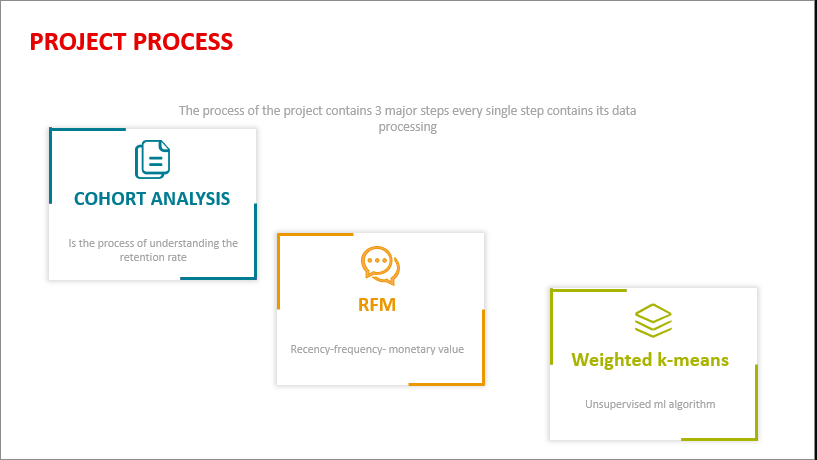

## IMPORTING LIBARARIES  ## 

In [1]:
# data manuplation

import pandas as pd 
import numpy as np 

#data viz

import matplotlib.pyplot as plt
import seaborn as sns 

#date manuplation

from datetime import datetime,timedelta

# data pre-processing 

from sklearn.preprocessing import StandardScaler

# hierarchial clustring 
import scipy.cluster.hierarchy as sch

# k-mean clustring 
from sklearn.cluster import KMeans

# evaultion 
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

sns.set_style("dark")

## IMPORTING DATA ## 

In [2]:
data=pd.read_excel('Online Retail.xlsx')

## DATA CLEANING ## 

### Null Values  ###

In [3]:
## CHECKING FOR NULL VALUES 
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# MISSING VALUES %
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

InvoiceNo - 0%
StockCode - 0%
Description - 0%
Quantity - 0%
InvoiceDate - 0%
UnitPrice - 0%
CustomerID - 25%
Country - 0%


In [5]:
# DROP null values 
data.dropna(subset='CustomerID',inplace=True)

### Duplicates

In [6]:
print ("the number of duplicates values is : ",data.duplicated().sum())

the number of duplicates values is :  5225


In [7]:
# remove duplicates values 
data = data.drop_duplicates()

### Data Types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


### Customer ID 

In [9]:
data['CustomerID']=data['CustomerID'].astype('int')

## DATA EXPLORATION 

In [10]:
data['TotalAmount']=data['UnitPrice']*data['Quantity']

### Statistical Analysis  For Quntative Variables

In [11]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638
std,250.283037,69.764035,1714.006089,430.352218
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,4.250000
50%,5.000000,1.950000,15145.000000,11.700000
75%,12.000000,3.750000,16784.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


### Statistical Analysis  For Qualitative  Variables

In [12]:
data.describe(include=['O'])

,InvoiceNo,StockCode,Description,Country
count,401604,401604,401604,401604
unique,22190,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2065,2058,356728


## Filtering

### Numerical Filtering 

In [13]:
data=data[(data['Quantity']>0) & (data['TotalAmount']>0)]

### Categorical Filtering 

In [14]:
data=data[~data['InvoiceNo'].astype(str).str.contains('c')]

## EDA 

### UNIUQE CUSTOMERS 

In [15]:
print('the number of unique customers is :',data.CustomerID.nunique())

the number of unique customers is : 4338


### NUMBER OF TRANSACTIONS

In [16]:
print ( 'the number OF  transactions is :', data.InvoiceNo.value_counts().sum())

the number OF  transactions is : 392692


### NUMBER OF COUNTRIES

In [17]:
### NUMBER OF COUNTRIES

In [18]:
print ('the number of unique countries is :',data.Country.nunique())


the number of unique countries is : 37


### TIME TRANSFORMATION 

In [19]:
data['period'] = (data['InvoiceDate'].dt.hour % 24 + 4) // 4
data['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

## Perfered Time of purchasing 

In [20]:
prefered_time =data.period.value_counts(normalize=True)*100


Text(0.5, 1.0, 'prefered time of pruchasing ')

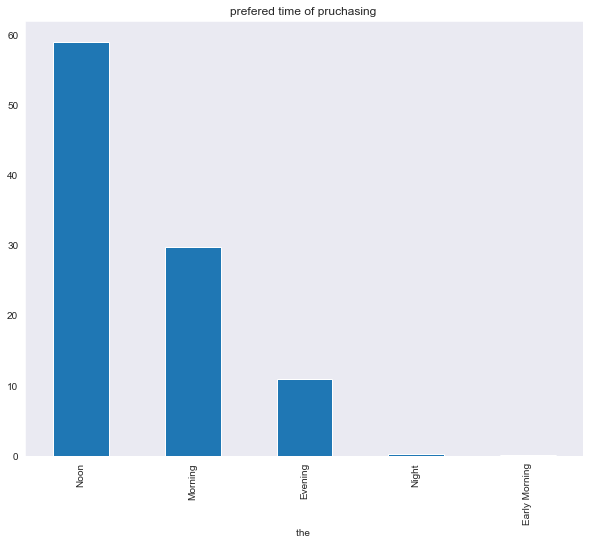

In [21]:
plt.figure(figsize=(10,8))
prefered_time.plot(kind='bar')
plt.xlabel('the ')
plt.ylabel('')
plt.title('prefered time of pruchasing ')

In [22]:
RFM=data.copy()

### Cohort Analysis

 Cohort analysis is a method of analyzing data that divides a group of users into smaller subgroups, or cohorts, based on common characteristics or experiences. These cohorts can then be analyzed over time to identify trends and patterns in behavior, which can be useful for making informed business decisions.

Here is a general example of how cohort analysis might be presented in a chart or graph:

    X-axis: Time (e.g. months, quarters, years)
    Y-axis: Metric of interest (e.g. revenue, retention rate, average order value)
    Each line represents a different cohort (e.g. customers who made their first purchase in January, February, March, etc.)

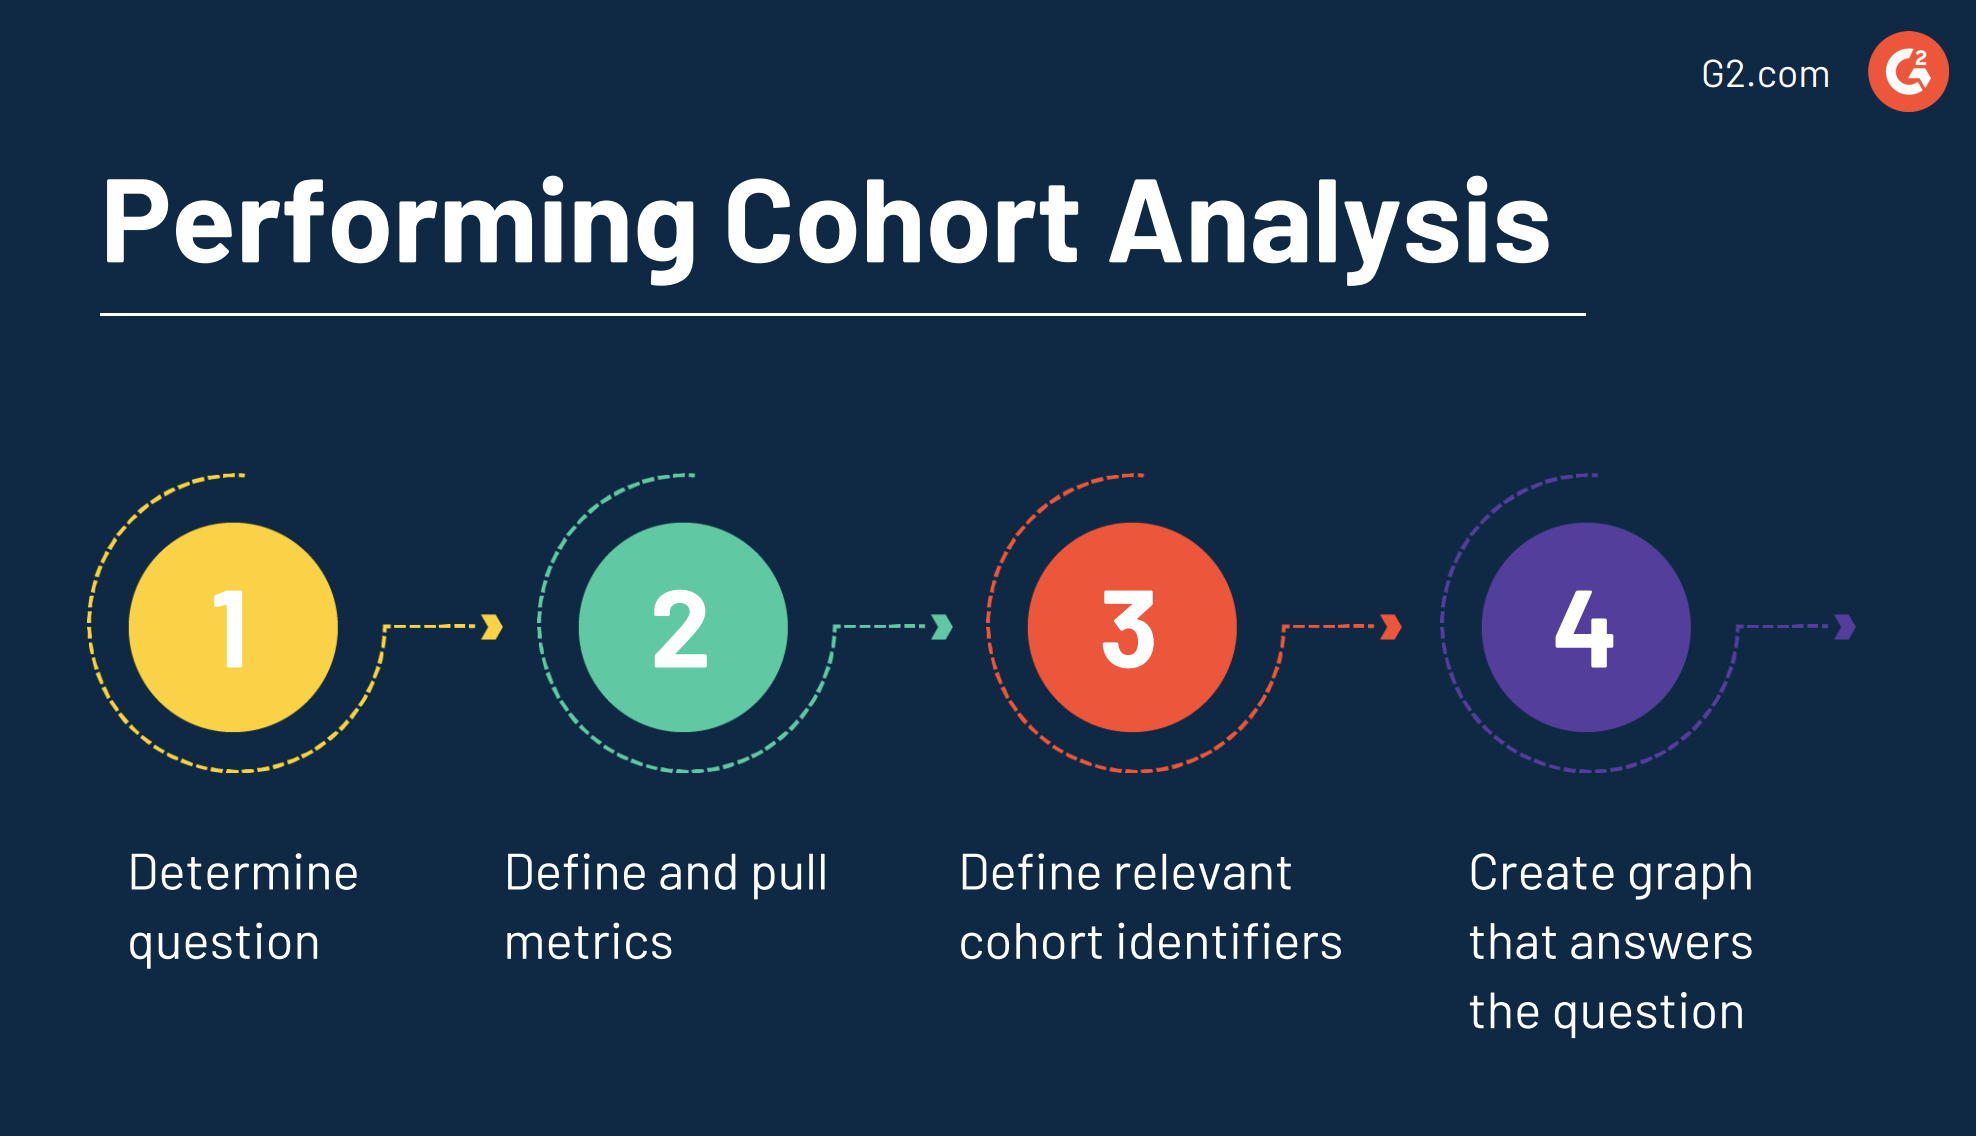

### Data transfomation for cohort analysis 

In [23]:
# function to get the month from invoice date column
def get_month(x):
    return datetime(x.year,x.month,1)
    

### Payment Month 

In [24]:
# add a new column to the dataframe " extract the data from timestamp"
data['payment_month']=data['InvoiceDate'].apply(get_month)

In [25]:
# check for the new column
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,period,payment_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Morning,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Morning,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning,2010-12-01


### Cohort Month

In [26]:
# get the first date that a customer entered the database 
data['cohort_month']=data.groupby('CustomerID')['payment_month'].transform('min')

In [27]:
#function to get the diffrence in the two columns :: 
def get_diff(df,col):
    day=df[col].dt.day
    month=df[col].dt.month
    year=df[col].dt.year
    return day,month,year

### Cohort Index

In [28]:
# cohort month -- 
_,cohort_month,cohort_year=get_diff(data,'cohort_month')
# purchase month -- 
_,payment_month,payment_year=get_diff(data,'payment_month')
month_diff=payment_month-cohort_month
year_diff=payment_year-cohort_year
# get the diffrence -- 
data['cohort_index']= year_diff *12 +month_diff +1

In [29]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,period,payment_month,cohort_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Morning,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Morning,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning,2010-12-01,2010-12-01,1


## pivot table 

In [30]:
# CREATE PIVOT TABLE THAT CONTAINS THE UNQIUE CUSTOMER ID AND THE PAYMENT MONTH 
data.groupby('payment_month')['CustomerID'].nunique()

payment_month
2010-12-01     885
2011-01-01     741
2011-02-01     758
2011-03-01     974
2011-04-01     856
2011-05-01    1056
2011-06-01     991
2011-07-01     949
2011-08-01     935
2011-09-01    1266
2011-10-01    1364
2011-11-01    1664
2011-12-01     615
Name: CustomerID, dtype: int64

In [31]:
# GROUP BY COHORT MONTH AND INDEX BY THE UNIQUE CUSTOMER ID 
pivot_data=data.groupby(['cohort_month','cohort_index'])['CustomerID'].nunique().reset_index()

In [32]:
cohort=pivot_data.pivot(index='cohort_month',columns='cohort_index',values='CustomerID')
cohort

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# iloc used to divide the cohort value by itself along side the cohort index 
pivot=cohort.divide(cohort.iloc[:,0],axis=0)

In [34]:
pivot.index=pivot.index.strftime('%B' '%Y')
pivot=pivot.divide(pivot.iloc[:,0],axis=0)

## DATE COHORT "RETENTION RATE" 

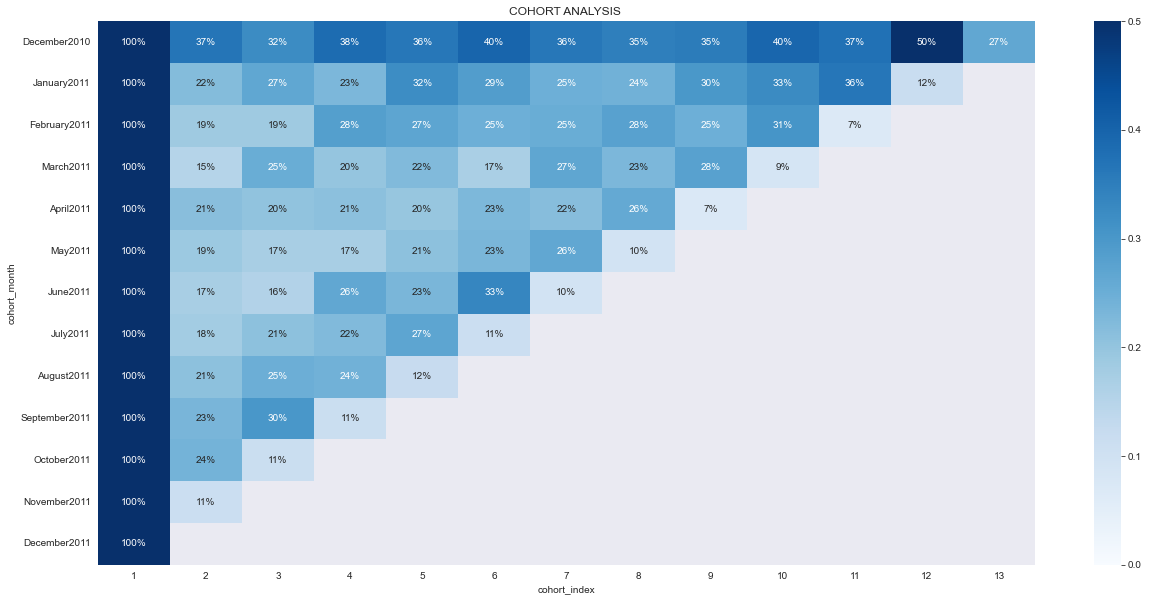

In [35]:
plt.figure(figsize=(21,10))
plt.title('COHORT ANALYSIS ')
sns.heatmap(pivot,annot=True,fmt = '.0%',vmin= 0.0,
           vmax=0.5,cmap='Blues')
plt.show()

In [36]:
pivot_data=data.groupby(['cohort_month','cohort_index'])['Quantity'].mean().reset_index()
cohort=pivot_data.pivot(index='cohort_month',columns='cohort_index',values='Quantity')

## AVG PRICE ## 

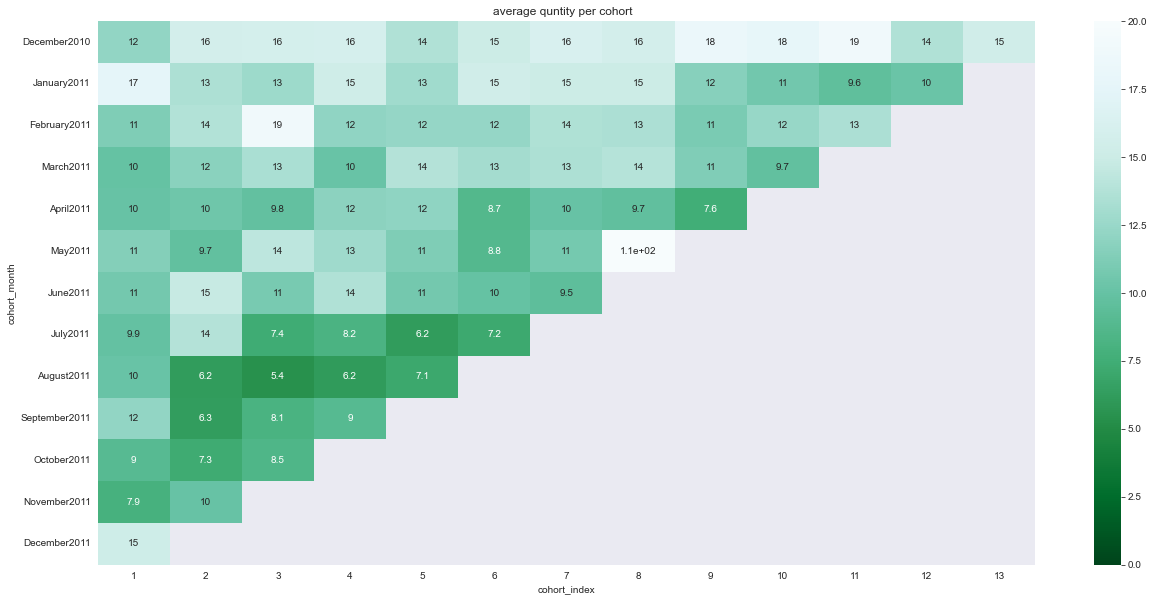

In [37]:
cohort.index=cohort.index.strftime('%B' '%Y')
plt.figure(figsize=(21,10))
plt.title('average quntity per cohort  ')
sns.heatmap(cohort,annot=True,vmin = 0.0,vmax =20,cmap='BuGn_r')
plt.show()

In [38]:

pivot_data=data.groupby(['cohort_month','cohort_index'])['TotalAmount'].mean().reset_index()
cohort=pivot_data.pivot(index='cohort_month',columns='cohort_index',values='TotalAmount')

## AVG QUNTAITY 

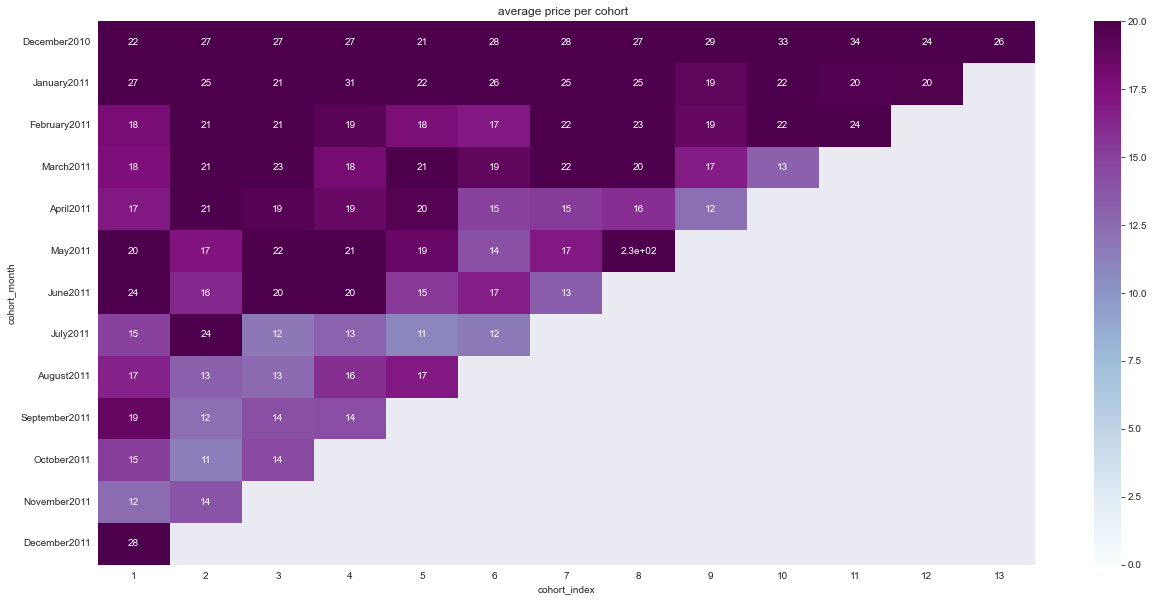

In [39]:
cohort.index=cohort.index.strftime('%B' '%Y')
plt.figure(figsize=(21,10))
plt.title('average price per cohort  ')
sns.heatmap(cohort,annot=True,vmin = 0.0,vmax =20,cmap='BuPu')
plt.show()

## RFM ANALYSIS

In [40]:
# read data into dataframe 
RFM.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Morning


In [41]:
# get the date of the last transaction.. 
max_date=RFM['InvoiceDate'].max()
today=max_date+timedelta(days = 1)

In [42]:
RFM = RFM.groupby('CustomerID').agg({
            'InvoiceDate':lambda x:(today-x.max()).days,
           'InvoiceNo':'count',
            'TotalAmount':'sum'})

In [43]:
RFM.head()

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


In [44]:
RFM.rename(columns={'InvoiceDate':'Recency',
                   'InvoiceNo':'Freq',
                   'TotalAmount':'Montearyvalue'},inplace=True)


In [45]:
RFM.head()

,Recency,Freq,Montearyvalue
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


## RFM SEGMENTS

### RECENCY 

In [46]:
# -1 to indiacte that less is better ----RECENCY
r_labels=range(4,0,-1)
r_q=pd.qcut(RFM['Recency'],q=4,labels=r_labels)
    # pd.qcut will devide the data into 4 q with the same size 
RFM=RFM.assign(R=r_q.values)

### FREQ

In [47]:
f_label=range(1,5)

f_q=pd.qcut(RFM['Freq'],q=4,labels=f_label)

RFM=RFM.assign(F=f_q.values)

### MONETARY VALUES 

In [48]:
m_label=range(1,5)
m_q= pd.qcut(RFM['Montearyvalue'],q=4,labels=m_label)
RFM=RFM.assign(M=f_q.values)

In [49]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        4338 non-null   int64   
 1   Freq           4338 non-null   int64   
 2   Montearyvalue  4338 non-null   float64 
 3   R              4338 non-null   category
 4   F              4338 non-null   category
 5   M              4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7 KB


### score 

In [50]:
# now its time for concation 
RFM['score']=RFM[['R','F','M']].sum(axis=1)

## segment

In [51]:
# segment 
def join(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
RFM['segment']=RFM.apply(join,axis=1)

In [52]:
RFM.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1.01.01.0
12347,2,182,4310.00,4,4,4,12,4.04.04.0
12348,75,31,1797.24,2,2,2,6,2.02.02.0
12349,19,73,1757.55,3,3,3,9,3.03.03.0
12350,310,17,334.40,1,1,1,3,1.01.01.0


## loyailty program 

In [53]:
# DIVIDE CUSTOMERS based on SCORE 
def segment(df):
    if df['score']>=9 :
        return 'gold'
    elif (df['score']>=5) and (df['score']<9):
        return 'silver'
    else:
        return "bronze"

In [54]:
RFM['tier']=RFM.apply(segment,axis=1)

In [55]:
RFM.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment,tier
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1.01.01.0,bronze
12347,2,182,4310.00,4,4,4,12,4.04.04.0,gold
12348,75,31,1797.24,2,2,2,6,2.02.02.0,silver
12349,19,73,1757.55,3,3,3,9,3.03.03.0,gold
12350,310,17,334.40,1,1,1,3,1.01.01.0,bronze


## Segment Statistcs 

In [56]:
RFM_stats=RFM.groupby('tier').agg({'Recency':'mean','Freq':'mean',
                                    'Montearyvalue':['mean','count']}).round(1)

In [57]:
RFM_stats

Recency   Freq Montearyvalue      
          mean   mean          mean count
tier                                     
bronze   196.3    8.9         527.8   821
gold      28.6  191.4        4120.9  1689
silver   105.0   33.9         817.1  1828

## cosistancey checking 

<AxesSubplot:xlabel='score'>

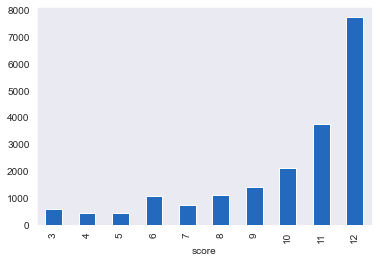

In [58]:
RFM.groupby('score').agg('Montearyvalue').mean().plot(kind='bar', colormap='vlag')

<AxesSubplot:xlabel='score'>

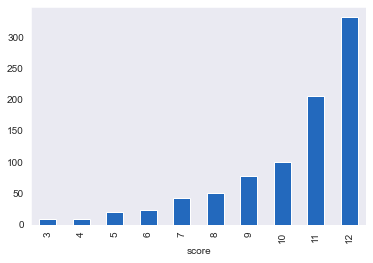

In [59]:
RFM.groupby('score').agg('Freq').mean().plot(kind='bar', colormap='vlag')

<AxesSubplot:xlabel='score'>

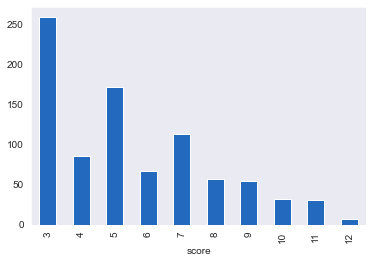

In [60]:
RFM.groupby('score').agg('Recency').mean().plot(kind='bar', colormap='vlag')

In [61]:
RFM.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment,tier
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1.01.01.0,bronze
12347,2,182,4310.00,4,4,4,12,4.04.04.0,gold
12348,75,31,1797.24,2,2,2,6,2.02.02.0,silver
12349,19,73,1757.55,3,3,3,9,3.03.03.0,gold
12350,310,17,334.40,1,1,1,3,1.01.01.0,bronze


In [62]:
#save to csv file 
RFM.to_csv('RFM')

## PRE-PROCESSING FOR CLUSTRING ALOGRITHM 

### OUTLIER DETECTION 

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


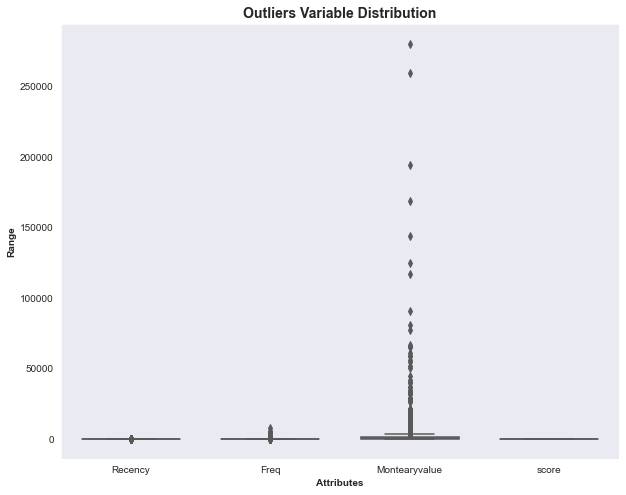

In [63]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM, orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [64]:
RFM.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment,tier
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1.01.01.0,bronze
12347,2,182,4310.00,4,4,4,12,4.04.04.0,gold
12348,75,31,1797.24,2,2,2,6,2.02.02.0,silver
12349,19,73,1757.55,3,3,3,9,3.03.03.0,gold
12350,310,17,334.40,1,1,1,3,1.01.01.0,bronze


In [65]:
cluster=RFM[['Recency','Freq','Montearyvalue']]

In [66]:
def plot(df,col):
    sns.distplot(df[col]);

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


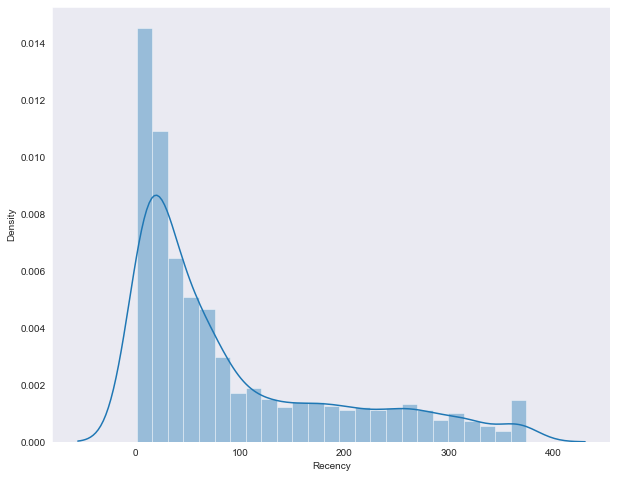

In [67]:
plot(cluster,'Recency');

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


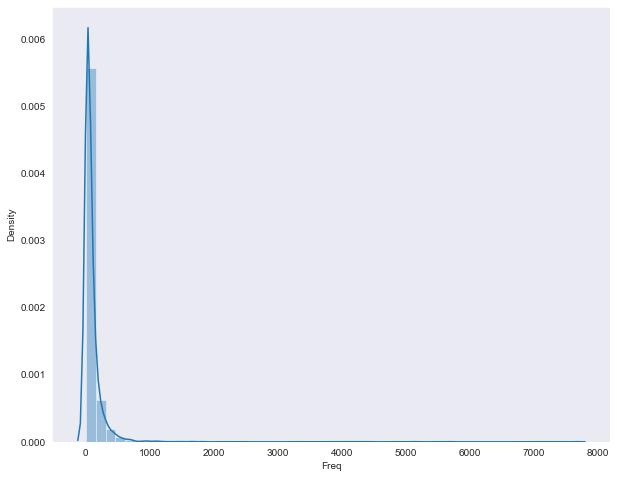

In [68]:
plot(cluster,'Freq')

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


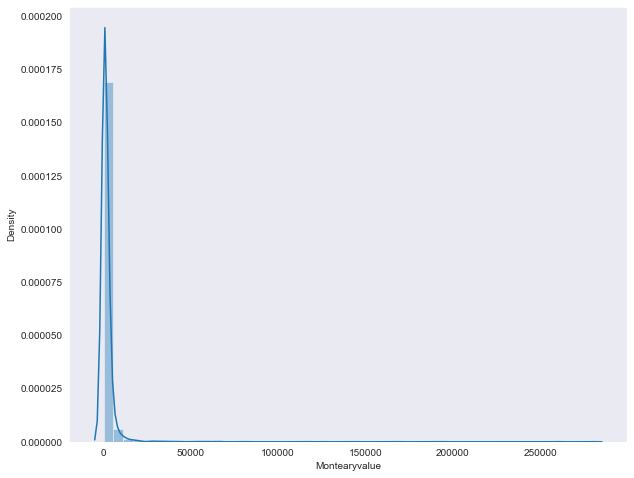

In [69]:
plot(cluster,'Montearyvalue')

In [70]:
rfm_log = cluster[['Recency', 'Freq', 'Montearyvalue']].apply(np.log, axis = 1).round(3)

In [71]:
rfm_log.head()

,Recency,Freq,Montearyvalue
CustomerID,,,
12346,5.787,0.000,11.254
12347,0.693,5.204,8.369
12348,4.317,3.434,7.494
12349,2.944,4.290,7.472
12350,5.737,2.833,5.812


## weighted  k-mean clustring algorithm 

In [72]:
x=rfm_log[['Freq','Montearyvalue']]
y=rfm_log['Recency']

In [73]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
X = np.array(x).astype(float)
Y = np.array(y.astype(float))

In [74]:
wt_kmeansclus = kmeans.fit(X,sample_weight = Y)
predicted_kmeans = kmeans.predict(X, sample_weight = Y)

In [75]:
weghited_kmean=RFM.copy()
weghited_kmean['segment']=kmeans.labels_
weghited_kmean.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment,tier
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1,bronze
12347,2,182,4310.00,4,4,4,12,1,gold
12348,75,31,1797.24,2,2,2,6,0,silver
12349,19,73,1757.55,3,3,3,9,1,gold
12350,310,17,334.40,1,1,1,3,0,bronze


In [76]:
group_analysis= weghited_kmean.groupby(['segment']).mean()
group_analysis

C:\Users\ahame\AppData\Local\Temp/ipykernel_17068/600685477.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_analysis= weghited_kmean.groupby(['segment']).mean()


,Recency,Freq,Montearyvalue,score
segment,,,,
0,102.436470,38.797980,626.360358,6.856991
1,39.271523,206.315894,4958.299226,10.504636
2,157.803590,8.633580,234.417350,3.939810


In [77]:
group_analysis['N OF OBSERVATION ']=weghited_kmean[['segment','Recency']].groupby(['segment']).count()

group_analysis['% of observation  ']=group_analysis['N OF OBSERVATION ']/group_analysis['N OF OBSERVATION '].sum()


In [78]:
group_analysis.head()

,Recency,Freq,Montearyvalue,score,N OF OBSERVATION,% of observation
segment,,,,,,
0,102.436470,38.797980,626.360358,6.856991,1881,0.433610
1,39.271523,206.315894,4958.299226,10.504636,1510,0.348087
2,157.803590,8.633580,234.417350,3.939810,947,0.218303


In [79]:
weghited_kmean['label']=weghited_kmean['segment'].map({0:'Need attention ',
                                    1:'LOYAL CUSTOMERS ',
                                    2:'AT RISK'})

In [80]:
weghited_kmean.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment,tier,label
CustomerID,,,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1,bronze,LOYAL CUSTOMERS
12347,2,182,4310.00,4,4,4,12,1,gold,LOYAL CUSTOMERS
12348,75,31,1797.24,2,2,2,6,0,silver,Need attention
12349,19,73,1757.55,3,3,3,9,1,gold,LOYAL CUSTOMERS
12350,310,17,334.40,1,1,1,3,0,bronze,Need attention


C:\Users\ahame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

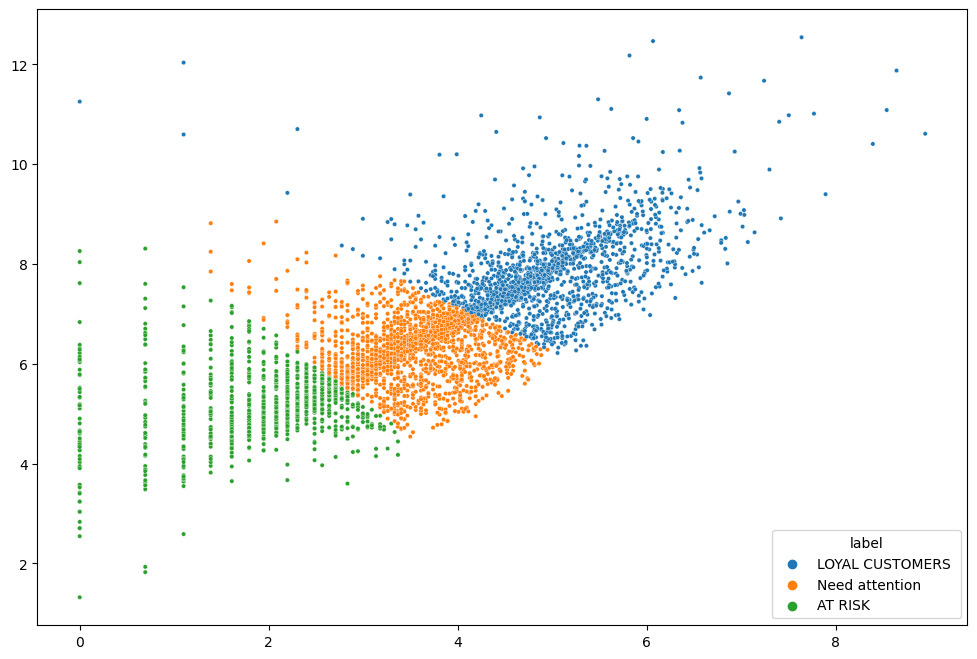

In [112]:
plt.style.use('default')

plt.figure(figsize=(12, 8))

sns.scatterplot(X[:,0], X[:,1], c=wt_kmeansclus.labels_.astype(float),hue=weghited_kmean['label'],s=10,cmap='tab20',marker='o')

In [82]:
print("Silhouette Coefficient: %0.3f" %silhouette_score(X, predicted_kmeans))

Silhouette Coefficient: 0.406


In [99]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(rfm_log)

KMeans(n_clusters=3, random_state=42)

In [100]:
segm_kmeans = RFM.copy()
segm_kmeans['Segment K-means'] = kmeans.labels_


In [96]:
segm_kmeans.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment,tier,Segment K-means
CustomerID,,,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1.01.01.0,bronze,2
12347,2,182,4310.00,4,4,4,12,4.04.04.0,gold,1
12348,75,31,1797.24,2,2,2,6,2.02.02.0,silver,2
12349,19,73,1757.55,3,3,3,9,3.03.03.0,gold,2
12350,310,17,334.40,1,1,1,3,1.01.01.0,bronze,0


In [101]:
segm_kmeans['Segment K-means']=segm_kmeans['Segment K-means'].map({0:'Need attention ',
                                    1:'LOYAL CUSTOMERS ',
                                    2:'AT RISK'})

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


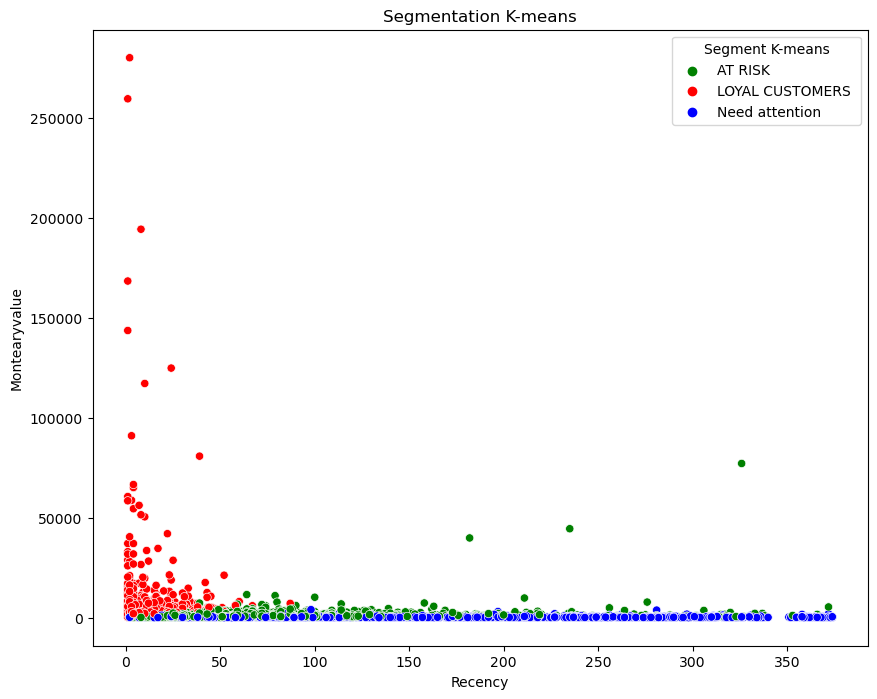

In [115]:
Labels=segm_kmeans['Segment K-means']
x_axis = segm_kmeans['Recency']
y_axis = segm_kmeans['Montearyvalue']
plt.figure(figsize = (10, 8))

sns.scatterplot(x_axis, y_axis,hue=Labels, palette = ['g', 'r','b'])

plt.title('Segmentation K-means')
plt.show()

In [117]:
print("Silhouette Coefficient: %0.3f" %silhouette_score(rfm_log,Labels))

Silhouette Coefficient: 0.303


## conclusion 